In [1]:
#neccesary libraries
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools

%matplotlib inline

In [3]:
#reading data
dt = pd.read_csv("creditcard.csv")
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#seperating data
X = dt.iloc[:, dt.columns != 'Class']
y = dt.iloc[:, dt.columns == 'Class']

In [5]:
# The Number of data points in the minority class
number_records_fraud = len(dt[dt.Class == 1])
fraud_indices = np.array(dt[dt.Class == 1].index)

# indices of the normal classes
normal_indices = dt[dt.Class == 0].index

# randomly select "x" number (number_records_fraud) from the indices picked above
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = dt.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage Of Normal Transactions: ", len(under_sample_data[under_sample_data.Class == 0])/float(len(under_sample_data)))
print("Percentage Of Fraud Transactions: ", len(under_sample_data[under_sample_data.Class == 1])/float(len(under_sample_data)))
print("Total Number Of Transactions In Resampled Data: ", len(under_sample_data))

Percentage Of Normal Transactions:  0.5
Percentage Of Fraud Transactions:  0.5
Total Number Of Transactions In Resampled Data:  984


In [6]:
# split whole dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions whole train dataset: ", len(X_train))
print("Number transactions whole test dataset: ", len(X_test))
print("Total number of whole transactions: ", len(X_train)+len(X_test))


# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
#display
print("")
print("Number transactions undersample train dataset: ", len(X_train_undersample))
print("Number transactions undersample test dataset: ", len(X_test_undersample))
print("Total number of undersample transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions whole train dataset:  199364
Number transactions whole test dataset:  85443
Total number of whole transactions:  284807

Number transactions undersample train dataset:  688
Number transactions undersample test dataset:  296
Total number of undersample transactions:  984


In [7]:
#Knearest neighbor classifier 
knn = KNeighborsClassifier(n_neighbors= [1, 2, 3, 4, 5])

# knn.fit(X, y)
param_grid = {'n_neighbors': [1, 2, 3, 4, 5]}
grid = GridSearchCV(knn,param_grid, cv=5, scoring='recall')
grid_results = grid.fit(X_train_undersample,y_train_undersample)
print(grid_results.best_params_);

/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: 

{'n_neighbors': 3}


/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: 

In [8]:
#decision treee classifier
clf = DecisionTreeClassifier(max_depth = [3, 4, 5, 6, 7], random_state=0)
param_grid_clf = {'max_depth': [3, 4, 5, 6, 7]}
grid_clf = GridSearchCV(clf,param_grid_clf, cv=5, scoring='recall') 
grid_results_clf = grid_clf.fit(X_train_undersample,y_train_undersample)
print(grid_results_clf.best_params_)

{'max_depth': 6}


In [9]:
rf = RandomForestClassifier(n_estimators = [5, 10, 20, 50], random_state = 0)
param_grid_rf = {'n_estimators': [5, 10, 20, 50]}
grid_rf = GridSearchCV(rf,param_grid_rf, cv=5, scoring='recall')
grid_results_rf = grid_rf.fit(X_train_undersample,y_train_undersample)
print(grid_results_rf.best_params_)
# from sklearn.ensemble import RandomForestClassifier

/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: Dat

{'n_estimators': 5}


/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/kirrishz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [10]:
#plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
#knn for undersampled
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = knn.predict(X_test_undersample.values)

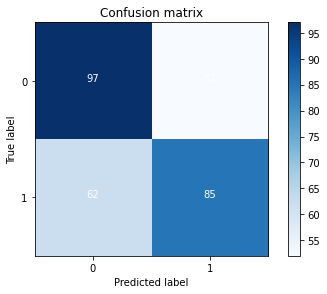

In [12]:
cnf_matrix_undersample = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_undersample
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [13]:
knn.fit(X_train,y_train.values.ravel())
y_pred = knn.predict(X_test.values)

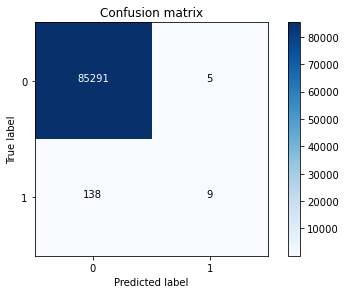

In [14]:
cnf_matrix_undersample = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_undersample
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [15]:
clf = DecisionTreeClassifier(max_depth = 3, random_state=0)
clf.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = clf.predict(X_test_undersample.values)

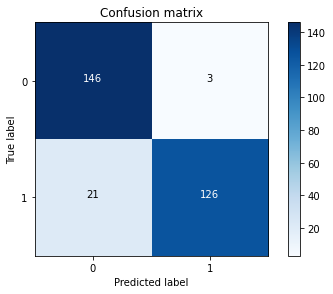

In [16]:
cnf_matrix_undersample = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_undersample
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [17]:
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test.values)

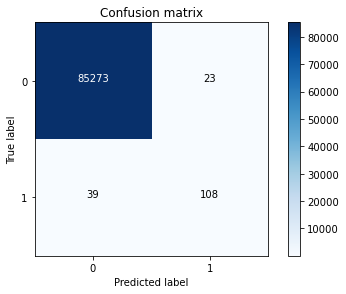

In [18]:
cnf_matrix_undersample = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_undersample
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [19]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = rf.predict(X_test_undersample.values)

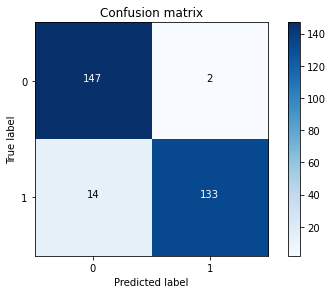

In [20]:
cnf_matrix_undersample = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_undersample
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [21]:
rf.fit(X_train,y_train.values.ravel())
y_pred = rf.predict(X_test.values)

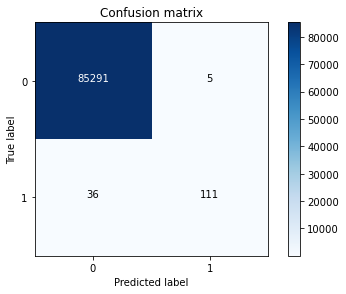

In [22]:
#confusion matrix
cnf_matrix_undersample = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_undersample
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the undersample testing dataset for threshold 0.1: 0.891156462585034
Recall metric in the undersample testing dataset for threshold 0.2: 0.891156462585034
Recall metric in the undersample testing dataset for threshold 0.3: 0.891156462585034
Recall metric in the undersample testing dataset for threshold 0.4: 0.5782312925170068
Recall metric in the undersample testing dataset for threshold 0.5: 0.5782312925170068
Recall metric in the undersample testing dataset for threshold 0.6: 0.5782312925170068
Recall metric in the undersample testing dataset for threshold 0.7: 0.3197278911564626
Recall metric in the undersample testing dataset for threshold 0.8: 0.3197278911564626
Recall metric in the undersample testing dataset for threshold 0.9: 0.3197278911564626


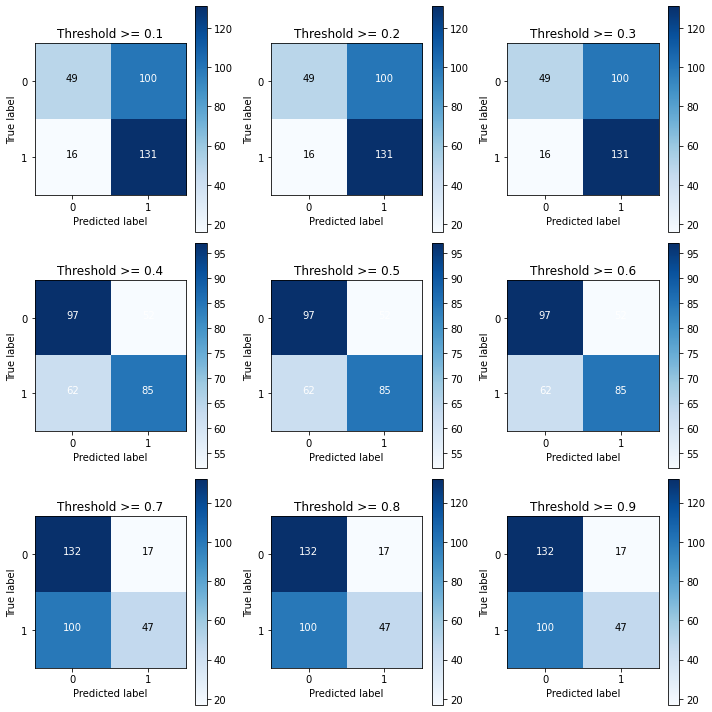

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = knn.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    #confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the undersample testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plotting non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

Recall metric in the undersample testing dataset for threshold 0.1: 0.891156462585034
Recall metric in the undersample testing dataset for threshold 0.2: 0.891156462585034
Recall metric in the undersample testing dataset for threshold 0.3: 0.891156462585034
Recall metric in the undersample testing dataset for threshold 0.4: 0.5782312925170068
Recall metric in the undersample testing dataset for threshold 0.5: 0.5782312925170068
Recall metric in the undersample testing dataset for threshold 0.6: 0.5782312925170068
Recall metric in the undersample testing dataset for threshold 0.7: 0.3197278911564626
Recall metric in the undersample testing dataset for threshold 0.8: 0.3197278911564626
Recall metric in the undersample testing dataset for threshold 0.9: 0.3197278911564626


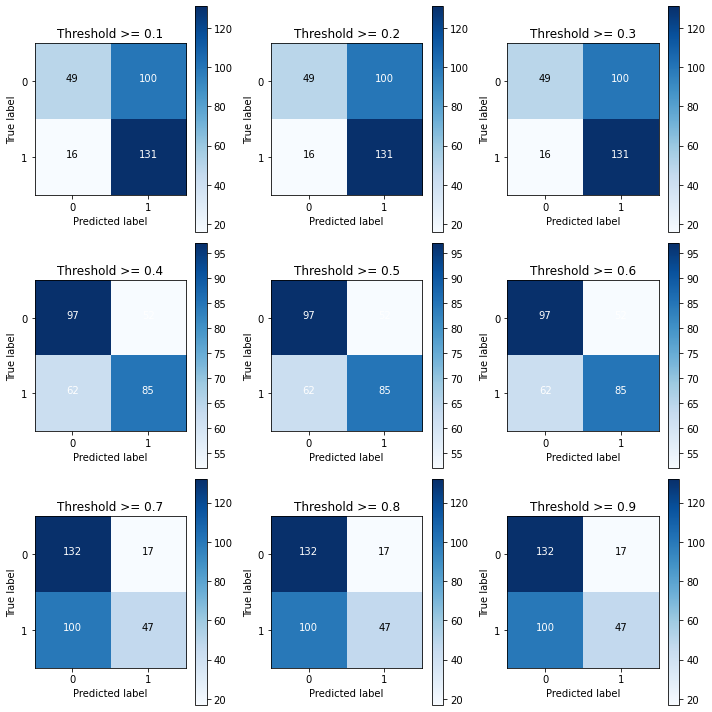

In [24]:
#  K nearest 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = knn.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    #confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the undersample testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plotting non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Recall metric in the undersample testing dataset for threshold 0.1: 0.9455782312925171
Recall metric in the undersample testing dataset for threshold 0.2: 0.9455782312925171
Recall metric in the undersample testing dataset for threshold 0.3: 0.8571428571428571
Recall metric in the undersample testing dataset for threshold 0.4: 0.8571428571428571
Recall metric in the undersample testing dataset for threshold 0.5: 0.8571428571428571
Recall metric in the undersample testing dataset for threshold 0.6: 0.8571428571428571
Recall metric in the undersample testing dataset for threshold 0.7: 0.8571428571428571
Recall metric in the undersample testing dataset for threshold 0.8: 0.8571428571428571
Recall metric in the undersample testing dataset for threshold 0.9: 0.7959183673469388


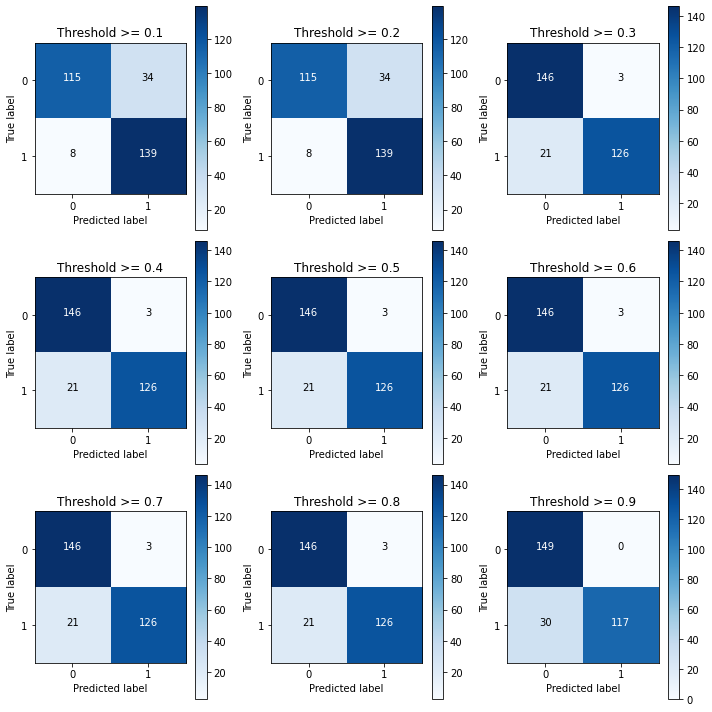

In [25]:
#decision tree
clf = DecisionTreeClassifier(max_depth = 3, random_state=0)
clf.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = clf.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    #confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the undersample testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plotting non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

Recall metric in the undersample testing dataset for threshold 0.1: 0.9795918367346939
Recall metric in the undersample testing dataset for threshold 0.2: 0.9659863945578231
Recall metric in the undersample testing dataset for threshold 0.3: 0.9387755102040817
Recall metric in the undersample testing dataset for threshold 0.4: 0.9387755102040817
Recall metric in the undersample testing dataset for threshold 0.5: 0.9047619047619048
Recall metric in the undersample testing dataset for threshold 0.6: 0.8775510204081632
Recall metric in the undersample testing dataset for threshold 0.7: 0.8435374149659864
Recall metric in the undersample testing dataset for threshold 0.8: 0.8163265306122449
Recall metric in the undersample testing dataset for threshold 0.9: 0.7687074829931972


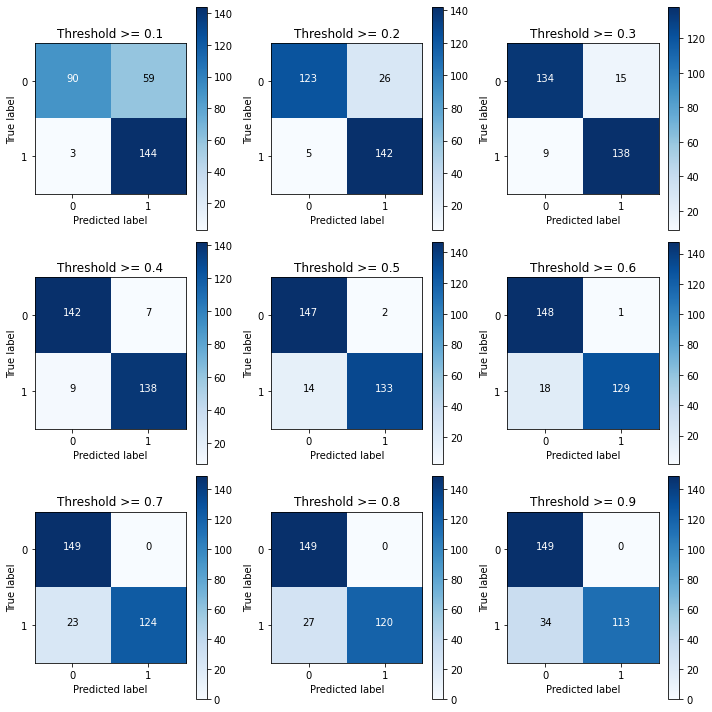

In [26]:
#random forest
rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
rf.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = rf.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    #confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print ("Recall metric in the undersample testing dataset for threshold {}: {}".format(i, cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))

    # Plotting non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

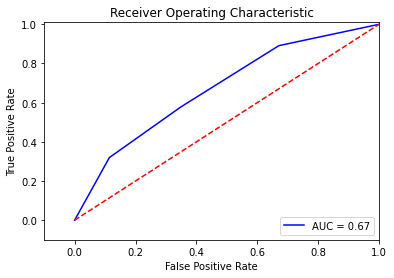

In [27]:
# ROC CURVE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_score = knn.fit(X_train_undersample,y_train_undersample.values.ravel()).predict_proba(X_test_undersample.values)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

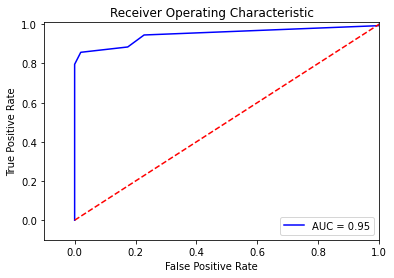

In [28]:
# ROC CURVE
clf = DecisionTreeClassifier(max_depth = 3, random_state=0)
y_pred_undersample_score = clf.fit(X_train_undersample,y_train_undersample.values.ravel()).predict_proba(X_test_undersample.values)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

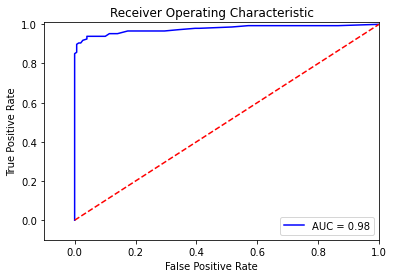

In [29]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 0)
y_pred_undersample_score = rf.fit(X_train_undersample,y_train_undersample.values.ravel()).predict_proba(X_test_undersample.values)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plotting ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()